# Learning and Decision Making

## Laboratory 1: Markov chains

In the end of the lab, you should export the notebook to a Python script (File >> Download as >> Python (.py)). Your file should be named `padi-lab1-groupXX.py`, where the `XX` corresponds to your group number and should be submitted to the e-mail <adi.tecnico@gmail.com>. 

Make sure...

* **... that the subject is of the form `[<group n.>] LAB <lab n.>`.** 

* **... to strictly respect the specifications in each activity, in terms of the intended inputs, outputs and naming conventions.** 

In particular, after completing the activities you should be able to replicate the examples provided (although this, in itself, is no guarantee that the activities are correctly completed).

### 1. The Markov chain model

Consider once again the Pacman modeling problem described in the Homework and for which you wrote a Markov chain model. In this lab, you will consider a larger version of the Pacman problem, described by the diagram:

<img src="pacman-big.png">

Recall that your chain should describe the motion of the single ghost moving in the environment, where: 

* The cells are numbered from 1 to 35, as indicated by the blue numbers;
* At each moment, the ghost is in one of the 35 cells; at the next time step, it will move to one of the adjacent cells with equal probability;
* The cell in the bottom left corner (cell `29`) is adjacent, to the left, to the cell in the bottom right corner (cell `35`). In other words, if the ghost "moves left" in cell `29` it will end up in cell `35` and vice-versa.

In this first activity, you will implement your Markov chain model in Python. You will start by loading the transition probability matrix from a `numpy` binary file, using the `numpy` function `load`. You will then consider the state space to consist of all possible cells in the environment, each represented as a string. For example, if the environment has 10 cells, the states should include the strings `'1'` to `'10'`. 

---

#### Activity 1.        

Write a function named `load_chain` that receives, as input, a string corresponding to the name of a file containing a transition probability matrix for some Pacman maze to be loaded and returns, as output, a two-element tuple corresponding to the Markov chain that describes the movement of the ghost, where:

* ... the first element is a tuple containing an enumeration of the state-space (i.e., each element of the tuple corresponds to a state of the chain, represented as a string).
* ... the second element is a `numpy` array corresponding to the transition probability matrix for the chain.

**Note:** The file provided contains the transition probability matrix for the maze in the diagram above. However, your code will be tested with mazes of different sizes, so **make sure not to hard-code the size of the environment into your code**.

---

In [120]:
# Insert your code here.
import numpy as np

def load_chain(P_file):
    P = np.load(P_file)
    
    states = () # create an empty tuple
    
    for i in range(1,P.shape[1]+1):
        states += (str(i),)
            
    M = (states, P)
    
    return M

In [121]:
M = load_chain('pacman-big.npy')

print(M[0])
print('Number of states:', len(M[0]))
print('Type of states:', type(M[0][0]))
print('First state:', M[0][0])
print('\nTransition probability matrix (type):', type(M[1]))
print('Transition probability matrix (dimension):', M[1].shape)

('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35')
Number of states: 35
Type of states: <class 'str'>
First state: 1

Transition probability matrix (type): <class 'numpy.ndarray'>
Transition probability matrix (dimension): (35, 35)


We provide below an example of application of the function, that you can use as a first "sanity check" for your code. Note, however, that the fact that you can replicate the examples below is not indicative that your code is correct.

```python
M = load_chain('pacman-big.npy')

print('Number of states:', len(M[0]))
print('Type of states:', type(M[0][0]))
print('First state:', M[0][0])
print('\nTransition probability matrix (type):', type(M[1]))
print('Transition probability matrix (dimension):', M[1].shape)```

Output:
```
Number of states: 35
Type of states: <class 'str'>
First state: 1

Transition probability matrix (type): <class 'numpy.ndarray'>
Transition probability matrix (dimension): (35, 35)
```

In the next activity, you will use the Markov chain model to evaluate the likelihood of any given path for the ghost.

---

#### Activity 2.

Write a function `prob_trajectory` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a trajectory, corresponding to a sequence of states (i.e., a tuple or list of strings, each string corresponding to a state).

Your function should return, as output, a floating point number corresponding to the probability of observing the provided trajectory, taking the first state in the trajectory as initial state. 

---

In [19]:
# Insert your code here.
def prob_trajectory(M, seq_states):
    
    #we wish to find the probability of the trajectory seq_states = s0, s1, s2, ..., st, given by the probability: 
    #P(x0 = s0, x1 = s1, ..., xt = st) = 
    #P(xt = st | xt-1 = st-1, ..., x0 = s0) * P(xt-1 = st-1, ..., x0 = s0) = 
    #P(xt = st | xt-1 = st-1) * P(xt-1 = st-1, ..., x0) (markov property)
    
    #Because of the Markov Property, we can find the probability of any trajectory by multiplying together the 
    #starting probability and all subsequent single-step probabilities.
    
    # initialization of the variable that represents the joint probability of observing the states that form the 
    # provided trajectory, being assigned the starting probability which takes the value of 1.0 (floating point 
    # number as required), since it is assumed the first state in the trajectory as initial state
    p = 1.0; 
    
    #iteration over the provided trajectory, starting from index 1 
    for i in range(1, len(seq_states)):
        
        index1 = M[0].index(seq_states[i-1]) #last state
        index2 = M[0].index(seq_states[i]) #present state 
        
        
        p = p*M[1][index1, index2] #1-step transition given the last observed state 
        
    return p

In [20]:
print("Prob. of trajectory ('3', '9', '15'):", prob_trajectory(M, ('3', '9', '15')))
print("Prob. of trajectory ('6', '7', '12', '11', '10'):", prob_trajectory(M, ('6', '7', '12', '11', '10')))
print("Prob. of trajectory ('10', '11', '17'):", prob_trajectory(M, ('10', '11', '17')))
print("Prob. of trajectory ('34', '35', '29'):", prob_trajectory(M, ('34', '35', '29')))

Prob. of trajectory ('3', '9', '15'): 0.16666666666666666
Prob. of trajectory ('6', '7', '12', '11', '10'): 0.0625
Prob. of trajectory ('10', '11', '17'): 0.0
Prob. of trajectory ('34', '35', '29'): 0.25


Example of application of the function with the chain $M$ from Activity 1.

```python
print("Prob. of trajectory ('3', '9', '15'):", prob_trajectory(M, ('3', '9', '15')))
print("Prob. of trajectory ('6', '7', '12', '11', '10'):", prob_trajectory(M, ('6', '7', '12', '11', '10')))
print("Prob. of trajectory ('10', '11', '17'):", prob_trajectory(M, ('10', '11', '17')))
print("Prob. of trajectory ('34', '35', '29'):", prob_trajectory(M, ('34', '35', '29')))
```

Output:
```
Prob. of trajectory ('3', '9', '15'): 0.16666666666666666
Prob. of trajectory ('6', '7', '12', '11', '10'): 0.0625
Prob. of trajectory ('10', '11', '17'): 0.0
Prob. of trajectory ('34', '35', '29'): 0.25
```

Note that your function should work with **any** Markov chain that is specified as a tuple like the one from Activity 1.

### 2. Stability

The next activities explore the notion of *stationary distribution* for the chain, a central concept in the the PageRank algorithm.

---

#### Activity 3

Write a function `stationary_dist` that receives, as input, a Markov chain in the form of a tuple like the one returned by the function in Activity 1. Your function should return, as output, a `numpy` array corresponding to a row vector containing the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [137]:
# Insert your code here.
def stationary_dist(M):
    
    #From the equation of stationarity uP=u, u must be a left eigenvector of P with eigenvalue 1.
    #np.linalg.eig returns the right eigenvectors, but the left eighenvector of a matrix is the right eigenvector 
    #of the transposed matrix.
    
    eigenvalues, eigenvectors = np.linalg.eig(M[1].T) 
    idx = np.isclose(eigenvalues, 1) # find index of eigenvalue = 1
    eigenvectors1 = eigenvectors[:,idx] # Left eigenvector with eigenvalue 1
    
    # normalize eigenvector to get a probability distribution (the sum of the probabilities must be exactly 1)
    stationary = eigenvectors1 / eigenvectors1.sum()
    
    # np.linalg.eig finds complex eigenvalues and eigenvectors, being only relevant the real part
    stationary = stationary.real

    return (stationary.T).flatten()

In [138]:
u_star = stationary_dist(M)

print('Stationary distribution:')
print(np.round(u_star, 2))

u_prime = u_star.dot(M[1])

print('\nIs u* * P = u*?', np.all(np.isclose(u_prime, u_star)))

Stationary distribution:
[0.03 0.03 0.05 0.03 0.03 0.03 0.03 0.04 0.03 0.03 0.03 0.03 0.05 0.03
 0.07 0.03 0.04 0.03 0.03 0.04 0.04 0.05 0.03 0.02 0.02 0.02 0.02 0.02
 0.01 0.   0.   0.01 0.01 0.01 0.01]

Is u* * P = u*? True


Example of application of the function with the chain $M$ from Activity 1.

```python
u_star = stationary_dist(M)

print('Stationary distribution:')
print(np.round(u_star, 2))

u_prime = u_star.dot(M[1])

print('\nIs u* * P = u*?', np.all(np.isclose(u_prime, u_star)))
```

Output:
```
Stationary distribution:
[0.03 0.03 0.05 0.03 0.03 0.03 0.03 0.04 0.03 0.03 0.03 0.03 0.05 0.03
 0.07 0.03 0.04 0.03 0.03 0.04 0.04 0.05 0.03 0.02 0.02 0.02 0.02 0.02
 0.01 0.   0.   0.01 0.01 0.01 0.01]

Is u* * P = u*? True
```

To complement Activity 3, you will now empirically establish that the chain is ergodic, i.e., no matter where the ghost starts, its visitation frequency will eventually converge to the stationary distribution.

---

#### Activity 4.

Write a function `compute_dist` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a numpy array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the bot is expected to take.

Your function should return, as output, a row vector (a `numpy` array) containing the distribution after $N$ steps of the chain.

---

In [23]:
# Insert your code here.
def compute_dist(M, u0, N):
    
    # Raising the matrix P to the Nth power, denoting the N-step transition probabilities
    P_tstep = np.linalg.matrix_power(M[1], N)
    
    # distribution probability of an N-step transition, given the initial distribution u0 
    u = np.dot(u0, P_tstep) 

    return u 

In [24]:
import numpy.random as rnd

# Number of states
nS = len(M[0])

rnd.seed(42)

# Initial random distribution
u = rnd.random((1, nS))
u = u / np.sum(u)

# Distrbution after 100 steps
v = compute_dist(M, u, 100)
print('\nIs u * P^100 = u*?', np.all(np.isclose(v, u_star)))

# Distrbution after 2000 steps
v = compute_dist(M, u, 2000)
print('\nIs u * P^2000 = u*?', np.all(np.isclose(v, u_star)))


Is u * P^100 = u*? False

Is u * P^2000 = u*? True


Example of application of the function with the chain $M$ from Activity 1.

```python
import numpy.random as rnd

# Number of states
nS = len(M[0])

rnd.seed(42)

# Initial random distribution
u = rnd.random((1, nS))
u = u / np.sum(u)

# Distrbution after 100 steps
v = compute_dist(M, u, 100)
print('\nIs u * P^100 = u*?', np.all(np.isclose(v, u_star)))

# Distrbution after 2000 steps
v = compute_dist(M, u, 2000)
print('\nIs u * P^2000 = u*?', np.all(np.isclose(v, u_star)))
```

Output:
```
Is u * P^100 = u*? False

Is u * P^2000 = u*? True
```

Is the chain ergodic? Justify, based on the results above.

#### Edit this cell and insert your answer here (you can delete this line).

In this last activity, an iterative approach is adopted in order to empirically verify if the Markov Chain is converging to some probability distribution $$\mu^{*} = \mu_0.P^{n}, {n\to\infty}$$, with $\mu_0$ being the initial distribution and $\mu^{*}$ the stationary distribution (computed in the activity 3).

As was demonstrated by the applied examples, namely when $n = 2000$, in fact this markov chain converges to its stationary distribution, hence the chain is ergodic. 

### 3. Simulation

In this part of the lab, you will *simulate* the actual bot, and empirically compute the visitation frequency of each state.

---

#### Activity 5

Write down a function `simulate` that receives, as inputs, 

* ... a Markov chain in the form of a tuple like the one returned by the function in Activity 1;
* ... a row vector (a `numpy` array) corresponding to the initial distribution for the chain;
* ... an integer $N$, corresponding to the number of steps that the bot is expected to take.

Your function should return, as output, a tuple containing a trajectory containing $N$ states, obtained from the initial distribution provided. Each element in the tuple should be a string corresponding to a state index.

---

**Note:** You may find useful to import the numpy module `numpy.random`.

In [112]:
# Insert your code here.
import numpy.random as rnd

def simulate(M, u0, N):
    
    # generate initial state, by considering the initial probability distribution
    x0 = rnd.choice(M[0], p = u0[0,:])
    
    # simulate:
    X = (x0,) # initiate the variable that represents the trajectory, being assigned the first generated state

    # iterate over the remaining N-1 number of steps that the bot is expected to take
    for t in range(N-1):
        
        xt = M[0].index(X[t])
        
        # generate state at step t+1, by considering the probability distribution P(Xt+1| Xt = xt) 
        xt1 = rnd.choice(M[0], p = (M[1][xt,:]))
        
        #adding the present generated state to the trajectory 
        X += (xt1, )
    return X

In [117]:
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

np.random.seed(42)

# Simulate short trajectory
traj = simulate(M, u, 10)
print('Small trajectory:', traj)

# Simulate a long trajectory
traj = simulate(M, u, 10000)
print('End of large trajectory:', traj[-10:])

Small trajectory: ('14', '15', '16', '17', '10', '11', '10', '17', '16', '17')
End of large trajectory: ('13', '8', '1', '8', '1', '8', '1', '8', '13', '20')


Example of application of the function with the chain $M$ from Activity 1.

```python
# Number of states
nS = len(M[0])

# Initial, uniform distribution
u = np.ones((1, nS)) / nS

np.random.seed(42)

# Simulate short trajectory
traj = simulate(M, u, 10)
print('Small trajectory:', traj)

# Simulate a long trajectory
traj = simulate(M, u, 10000)
print('End of large trajectory:', traj[-10:])
```

Output:
```
Small trajectory: ('14', '15', '16', '17', '10', '11', '10', '17', '16', '17')
End of large trajectory: ('13', '8', '1', '8', '1', '8', '1', '8', '13', '20')
```

Note that, even if the seed is fixed, it is possible that your trajectories are slightly different.

---

#### Activity 6

Use the function `simulate` from Activity #5 to generate a 20,000-step trajectory. Plot the histogram of the obtained trajectory using the function `hist` from the module `matplotlib.pyplot`. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #3.

**Note**: Don't forget to load `matplotlib`. 

**Note 2**: Recall that the states in the trajectory obtained from the function `simulate` consist of *strings*, which should be converted to state indices to match the entries in the distribution computed in Activity #3.

---

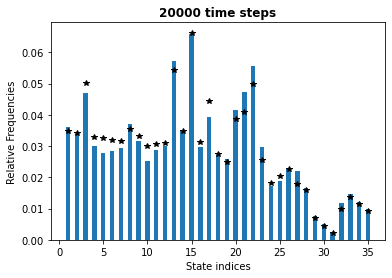

In [134]:
# Insert your code here.
import matplotlib.pyplot as plt
%matplotlib inline

nsteps = 20000

#np.random.seed(42) 

traj = simulate(M, u, nsteps)

# initialize the array that will contain in each entry the state indices matching 
# the entries in the distribution computed in Activity #3 
traj_indices = np.zeros((1,nsteps)) 

#iterate over the trajectory
for i in range(0, nsteps):
    traj_indices[0,i] = int(traj[i])

# array of bin edges, giving one bin for each state, containing values from [left_edge, right_edge), 
# that is, it includes the left edge and excludes the right one. The last bin contains the values [left_edge, right_edge]
bins = np.arange(1,len(M[0])+2) - 0.5

# Plot commands

# creating histogram. note that density=False would make counts. setting density=True, 
# P is the probability distribution of the Markov chain at time nsteps (= 20000 for this specific exercise)
P, bins, pacthes = plt.hist(traj_indices[0,:], bins=bins, density = True, rwidth = 0.5) 

plt.plot(range(1,len(M[0])+1), u_star, '*k')
plt.xlabel('State')
plt.ylabel('Relative Frequencies')
plt.title(f"{nsteps} time steps",
          fontweight ="bold")
  
plt.show() # Show plot

As expected, the relative frequencies after 20000 steps are similar to the ones given by the stationary distribution. If more steps were taken, this relative frequncies would converge even more to the stationary distribution, because of its ergodic behaviour. 